In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from Ska.Matplotlib import cxctime2plotdate
from astropy.constants import R_earth
from astropy.coordinates import solar_system_ephemeris
from glob import glob
from fptemp_study import RunFPTempModels
from collections import defaultdict

In [2]:
runner = RunFPTempModels("2021:001:00:00:00", "2023:365:23:59:59")

In [3]:
tini = "m120"
case = "best"

In [4]:
solar_system_ephemeris.set('jpl')
R_e = R_earth.to_value("km")

In [5]:
fns = glob(f"data/acisfp_model_perigee_*{tini}.h5")
fns.sort()

In [6]:
years = [fn.split("_")[3] for fn in fns]
unique_years = list(set(years))
unique_years.sort()
num_uy = len(unique_years)

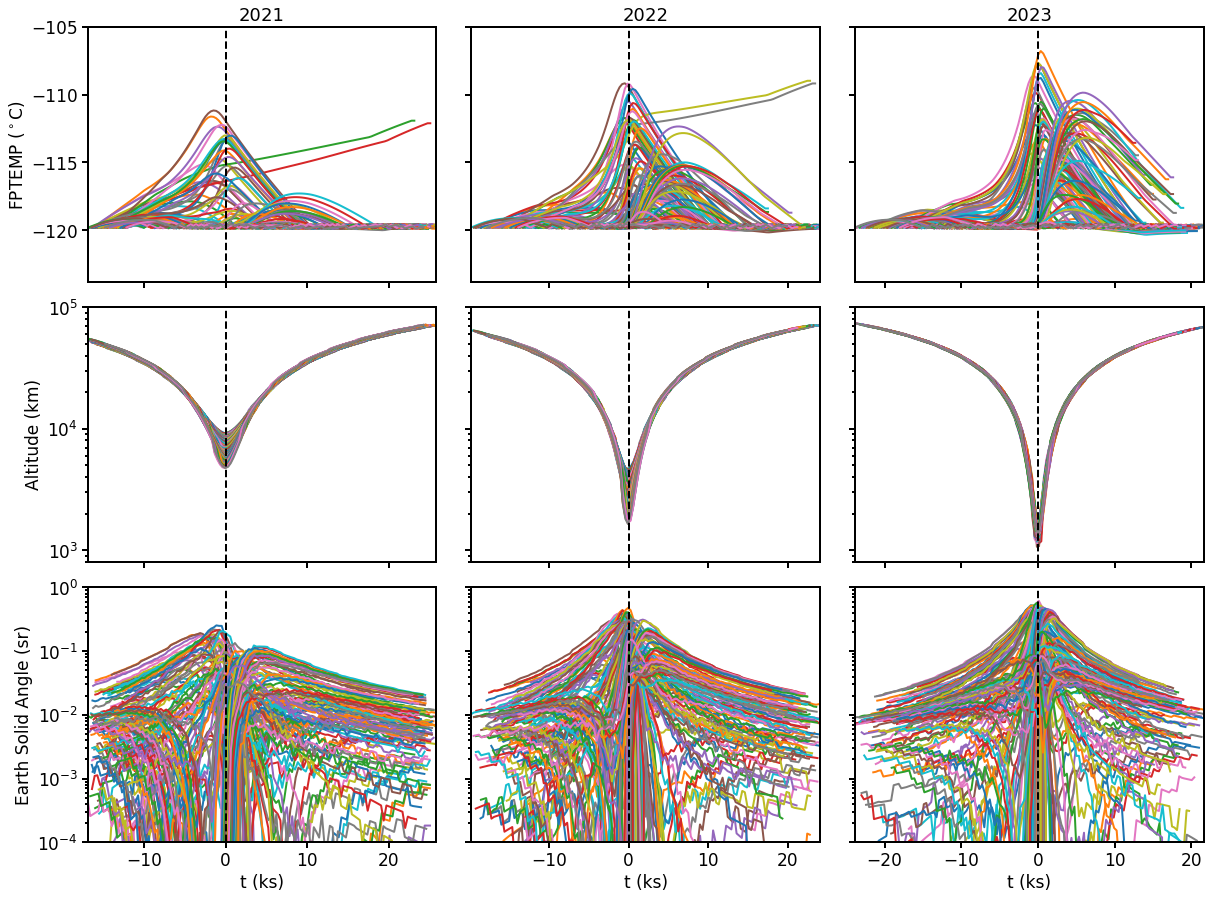

In [19]:
plt.rc("font", size=17)
plt.rc("axes", linewidth=2)
current_year = ""
fig, axes = plt.subplots(nrows=3, ncols=num_uy, figsize=(20,15))
tmin = defaultdict(lambda: 1.0e99) 
tmax = defaultdict(lambda: -1.0e99) 
maxtemps = {}
for i, fn in enumerate(fns):
    year = years[i]
    j = unique_years.index(year)
    if year != current_year:
        current_year = year
        maxtemps[current_year] = defaultdict(list)
    with h5py.File(fn, "r") as f:
        times = f['times'][0]*1.0e-3
        tperigee = runner.per_times[i]*1.0e-3
        times -= tperigee
        t = f['ephem_t'][0]*1.0e-3-tperigee
        tmin[j] = min(times[0], tmin[j])
        tmax[j] = max(times[-1], tmax[j])
        r = np.sqrt(
            f["ephem_x"][0]**2+
            f["ephem_y"][0]**2+
            f["ephem_z"][0]**2
        )*1.0e-3
        a = r - R_e
        temp = f['fptemp'][()]
        norbits = temp.shape[0]
        esa = f['esa'][()]
        maxtemp = np.max(temp[:,25:], axis=1)
        if case == "worst":
            idx = np.argmax(maxtemp)
        elif case == "best":
            idx = np.argmin(maxtemp)
        maxtemps[current_year]["pitch"].append(f["pitch"][:,0])
        maxtemps[current_year]["temp"].append(maxtemp)
        axes[0, j].plot(times, temp[idx], '-', lw=2)
        axes[1, j].plot(t, a, '-', lw=2)
        axes[2, j].plot(times, esa[idx], '-', lw=2)
for i, ax in enumerate(axes[0]):
    ax.set_title(unique_years[i], fontsize=18)
    ax.set_xticks([-30, -20, -10, 0, 10, 20, 30])
    ax.set_xticklabels([])
    if i == 0:
        ax.set_ylabel("FPTEMP ($^\circ$C)")
    else:
        ax.set_yticklabels([])
    if case == "best":
        ax.set_ylim(temp[-1][0]-4, -105)
    elif case == "worst":
        ax.set_ylim(temp[-1][0]-4, -75)
    ax.axvline(0.0, lw=2, color='k', ls='--')
    ax.tick_params(which='major', width=2, length=6)
for i, ax in enumerate(axes[1]):
    ax.set_xticks([-30, -20, -10, 0, 10, 20, 30])
    ax.set_xticklabels([])
    ax.set_yscale("log")
    ax.set_ylim(800, 1.0e5)
    if i == 0:
        ax.set_ylabel("Altitude (km)")
    else:
        ax.set_yticklabels([])
    ax.axvline(0.0, lw=2, color='k', ls='--')
    ax.tick_params(which='major', width=2, length=6)
    ax.tick_params(which='minor', width=2, length=3)
for i, ax in enumerate(axes[2]):
    ax.set_xticks([-30, -20, -10, 0, 10, 20, 30])
    ax.set_yscale("log")
    if case == "best":
        ax.set_ylim(1.0e-4, 1)
    elif case == "worst":
        ax.set_ylim(1.0e-4, 6)
    if i == 0:
        ax.set_ylabel("Earth Solid Angle (sr)")
    else:
        ax.set_yticklabels([])
    ax.axvline(0.0, lw=2, color='k', ls='--')
    ax.set_xlabel("t (ks)")
    ax.tick_params(which='major', width=2, length=6)
    ax.tick_params(which='minor', width=2, length=3)
for i in range(3):
    for j in range(3):
        axes[i, j].set_xlim(tmin[j], tmax[j])
fig.subplots_adjust(wspace=0.1, hspace=0.1)
fig.savefig(f"2020to2024_perigees_{tini}_{case}.pdf")

In [22]:
for year in maxtemps:
    maxtemps[year] = {k: np.concatenate(maxtemps[year][k]) for k in maxtemps[year]}

In [31]:
pitch_bins = np.linspace(40, 180, 29)
temp_bins = np.linspace(-120.0, -75.0, 19)

ValueError: 'turbo' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

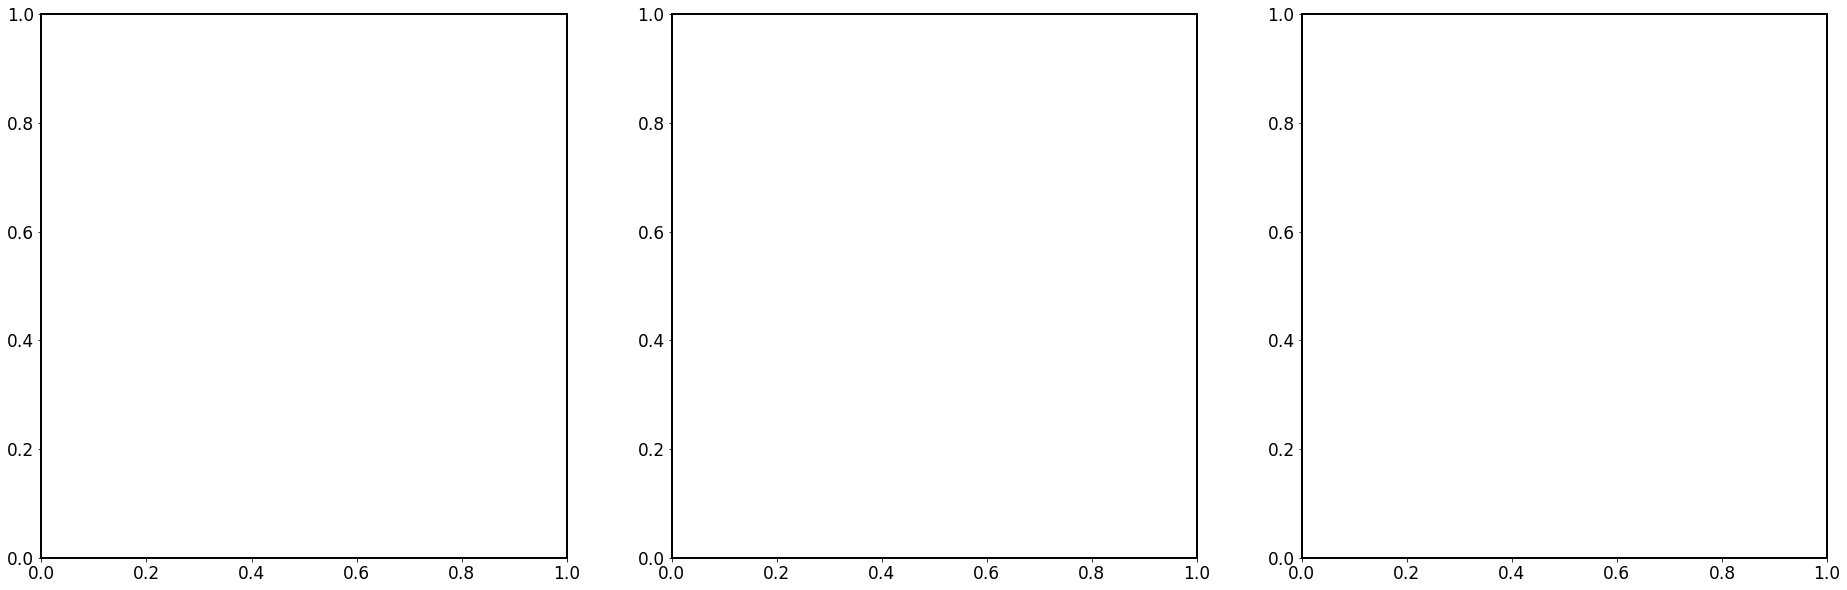

In [66]:
plt.rc("font", size=17)
plt.rc("axes", linewidth=2)
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(32,10))
_, _, _, im1 = ax1.hist2d(maxtemps['2021']['pitch'], maxtemps['2021']['temp'], 
                          bins=[pitch_bins, temp_bins], vmin=0, vmax=325, cmap='turbo')
ax1.tick_params(length=6, width=2)
ax1.set_title("2021")
ax1.set_xlabel("Pitch (degree)")
ax1.set_ylabel("Maximum FPTEMP_11 ($^\circ$C)")
_, _, _, im2 = ax2.hist2d(maxtemps['2022']['pitch'], maxtemps['2022']['temp'], 
                          bins=[pitch_bins, temp_bins], vmin=0, vmax=325, cmap='turbo')
ax2.tick_params(length=6, width=2)
ax2.set_title("2022")
ax2.set_xlabel("Pitch (degree)")
_, _, _, im3 = ax3.hist2d(maxtemps['2023']['pitch'], maxtemps['2023']['temp'], 
                          bins=[pitch_bins, temp_bins], vmin=0, vmax=325, cmap='turbo')
ax3.tick_params(length=6, width=2)
ax3.set_title("2023")
ax3.set_xlabel("Pitch (degree)")
cax = fig.add_axes([0.907, 0.125, 0.015, 0.755])
cbar3 = plt.colorbar(im3, cax=cax)
cbar3.ax.tick_params(length=6, width=2)